In [5]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from matplotlib import font_manager
f_path = "/Library/Fonts/Arial Unicode.ttf"
font_manager.FontProperties(fname=f_path).get_name()
#from matplotlib import rc
#rc('font', family = "Arial Unicode MS")

'Arial Unicode MS'

In [73]:
df_0 = pd.read_csv("./skt_raw_data/"+os.listdir("./skt_raw_data/")[0])
df_1 = pd.read_csv("./skt_raw_data/"+os.listdir("./skt_raw_data/")[1])
df = df_0.append(df_1)
for i in range(2, 73):
    try:
        df_0 = pd.read_csv("./skt_raw_data/"+os.listdir("./skt_raw_data/")[i])
        df = df.append(df_0)
    except:
        pass


In [1]:
df = pd.read_pickle("./skt_raw_data.pkl")

In [2]:
df = df.sort_values(["일자", "시간대"])
df.reset_index(drop = True, inplace=True)
df.tail()

,일자,요일,시간대,업종,시도,시군구,읍면동,통화건수,이용건수,통화량
5445988,20190930,월,23,피자,서울특별시,서초구,양재동,5.0,NaN,NaN
5445989,20190930,월,23,피자,서울특별시,성북구,동선동2가,5.0,NaN,NaN
5445990,20190930,월,23,피자,서울특별시,송파구,가락동,5.0,NaN,NaN
5445991,20190930,월,23,피자,서울특별시,영등포구,영등포동5가,5.0,NaN,NaN
5445992,20190930,월,23,피자,서울특별시,중랑구,면목동,5.0,NaN,NaN


In [6]:
df.columns=["date", "weekday", "hour", "menu", "sido", "sigungu", "dong", "call1", "call2", "call3"]
df = df[df["date"]>=20181001][df["date"]<=20190930]
df["call1"].fillna(0, inplace=True)
df["call2"].fillna(0, inplace=True)
df["call3"].fillna(0, inplace=True)
df["count"] = df["call1"] +df["call2"]+df["call3"]
df = df.drop(columns=["call1","call2","call3","sido","dong"]).reset_index(drop=True)

ValueError: Length mismatch: Expected axis has 6 elements, new values have 10 elements

In [7]:
df_gu = df.groupby(by=["date", "weekday", "sigungu"], as_index=False).sum().drop(columns=["hour"]).reset_index(drop=True)

In [8]:
df_gu.tail()

,date,weekday,sigungu,count
9120,20190930,월,용산구,633.0
9121,20190930,월,은평구,698.0
9122,20190930,월,종로구,715.0
9123,20190930,월,중구,1662.0
9124,20190930,월,중랑구,635.0


In [9]:
df_gu["holiday"] = df_gu.weekday.apply(lambda x : 1 if x == "토" or x=="일" else 0)

In [10]:
holiday_df=pd.read_pickle("./holiday_df.pkl")

In [11]:
holiday_df.head()

,date,datename
0,20130101,신정
1,20130209,설날
2,20130210,설날
3,20130211,설날
4,20130301,삼일절


In [12]:
df_gu["date"] = df_gu.date.astype(str)
df_gu = pd.merge(df_gu, holiday_df, how = "left")
df_gu.loc[df_gu["datename"].notnull(), "holiday"] = 1

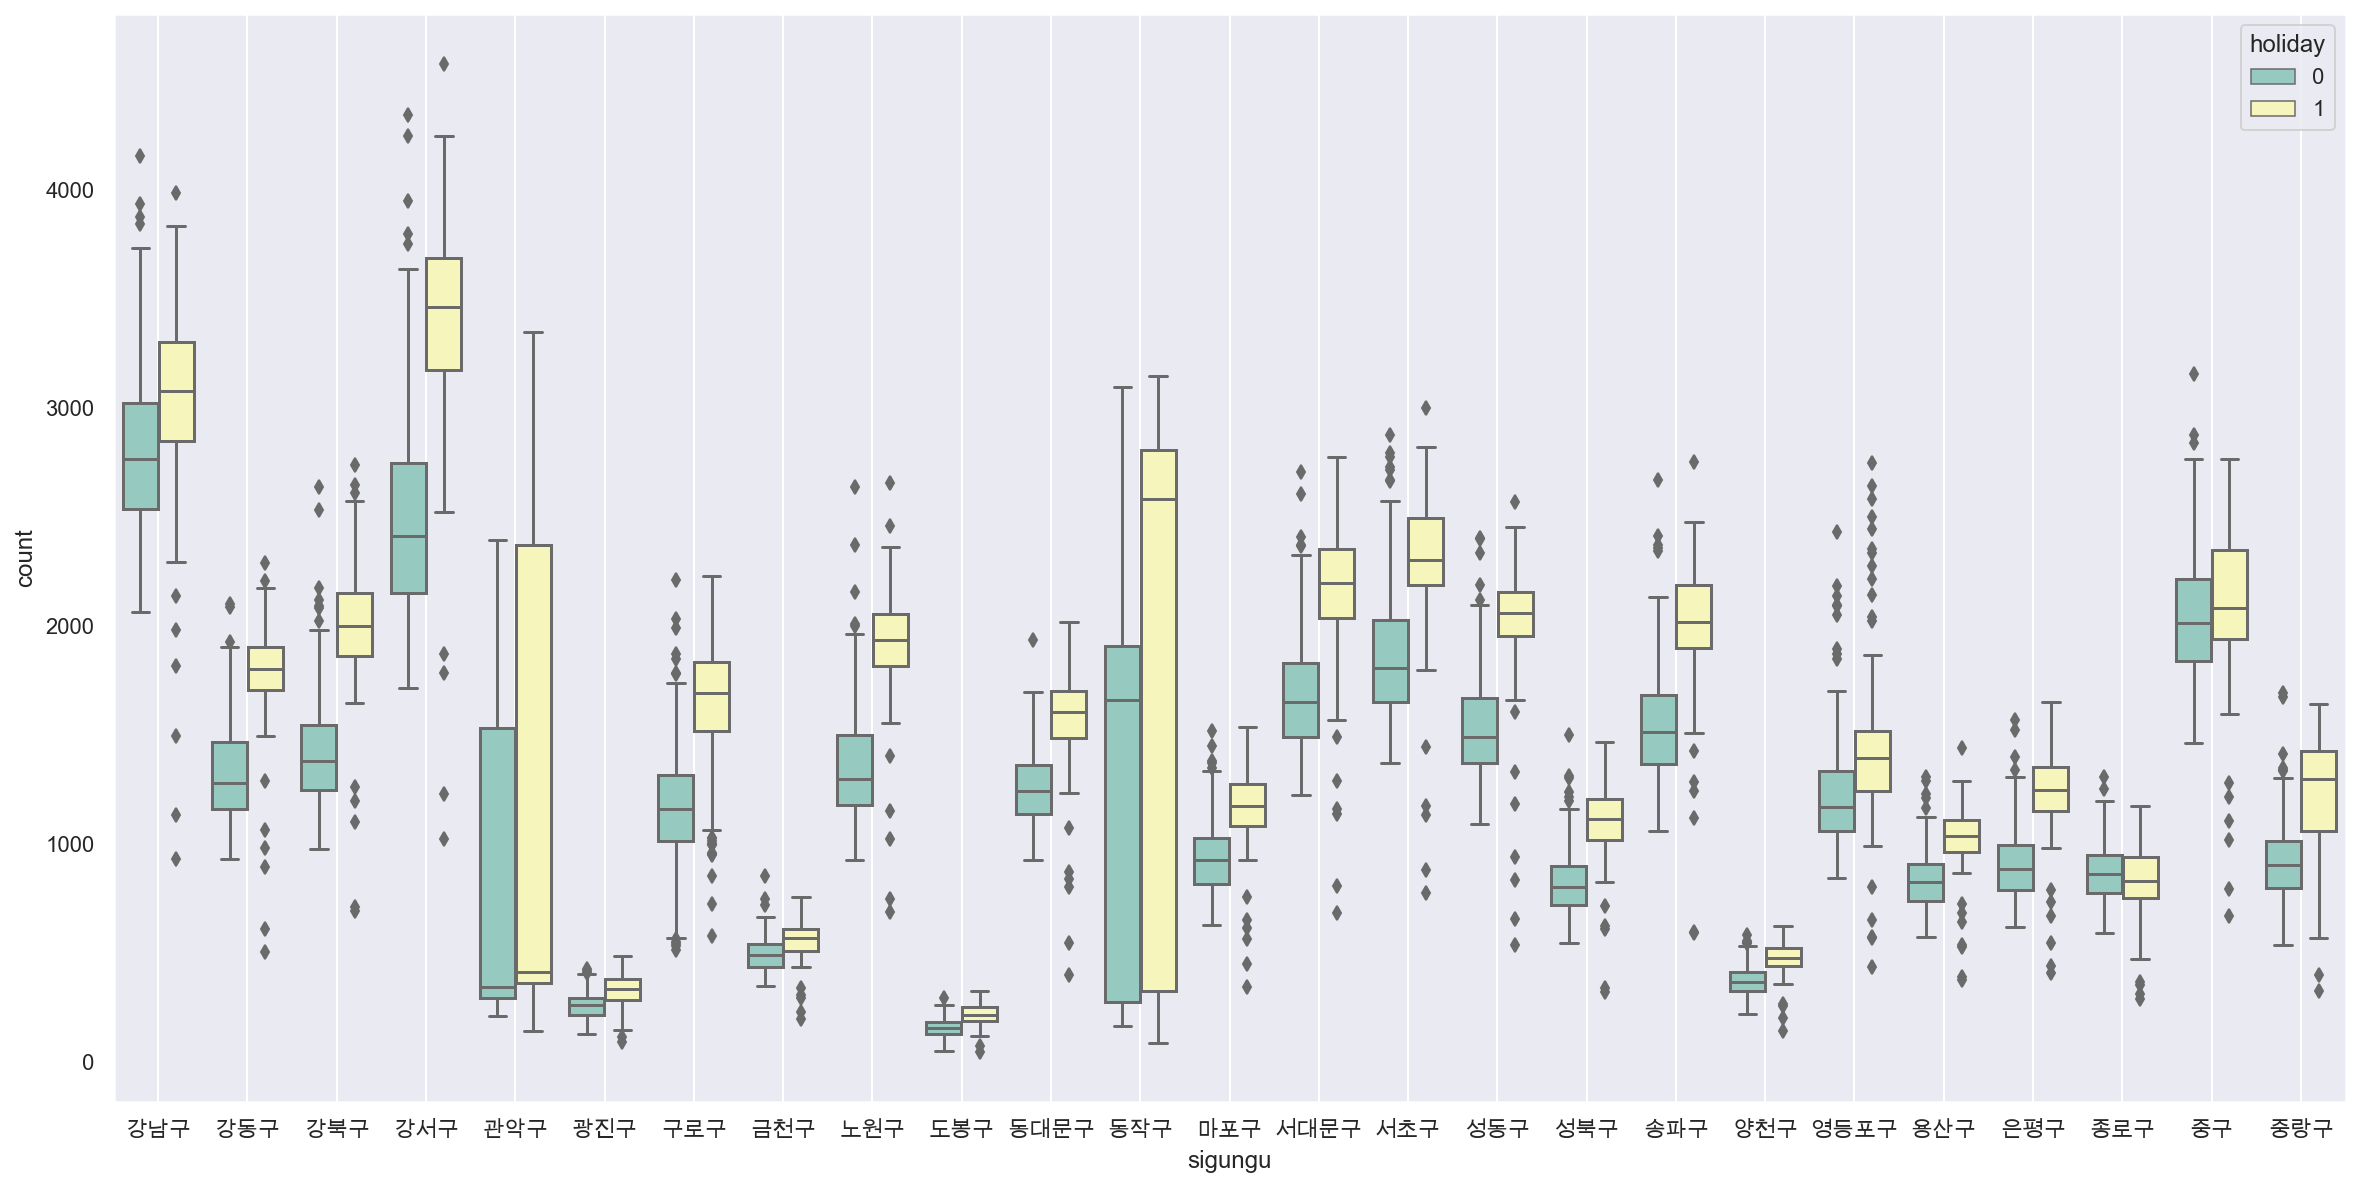

In [13]:
plt.figure(figsize=(20,10))
sns.boxplot(x="sigungu", y = "count", hue="holiday", data=df_gu, palette="Set3")
plt.grid()
plt.show()

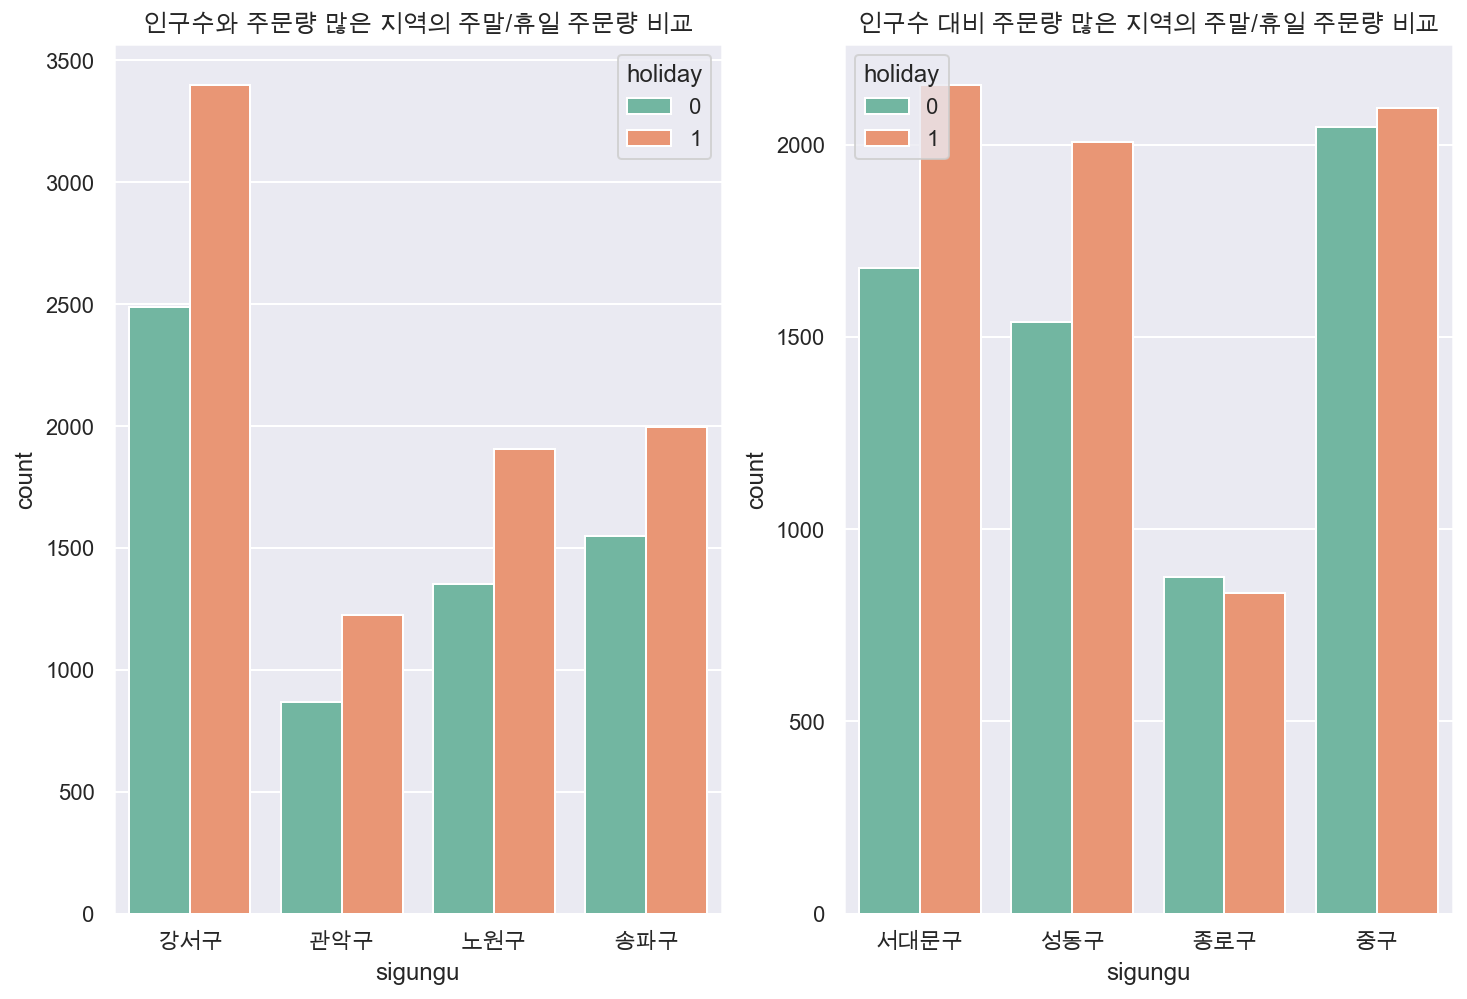

In [14]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(1, 2, 1, title = "인구수와 주문량 많은 지역의 주말/휴일 주문량 비교")
ax1 = sns.barplot(x='sigungu', y ='count', hue='holiday', palette="Set2",
            data=df_gu[df_gu["sigungu"].isin(["강서구", "송파구", "관악구", "노원구"])].groupby(["sigungu","holiday"])["count"].mean().reset_index())

ax2 = fig.add_subplot(1, 2, 2, title = "인구수 대비 주문량 많은 지역의 주말/휴일 주문량 비교")
ax2 = sns.barplot(x='sigungu', y ='count', hue='holiday',palette="Set2",
            data=df_gu[df_gu["sigungu"].isin(["종로구", "중구", "서대문구", "성동구"])].groupby(["sigungu","holiday"])["count"].mean().reset_index())

In [113]:
# 1. 인구수와 주문량이 모두 많은 지역 -> 평일보다 휴일 주문량이 훨씬 높음 
# 2. 인구수 대비 주분량이 많은 지역 (종로구, 중구) -> 평일과 휴일의 주문량이 매우 비슷함
# 3. 서대문구와 성동구 -> 공업지역과 학교여서 주문량이 많다고 예측하였는데, 주말 주문량이 높음 . . . 

In [94]:
df_gu.head()

,date,weekday,sigungu,count,holiday,datename
0,20181001,월,강남구,2540.0,0,NaN
1,20181001,월,강동구,1201.0,0,NaN
2,20181001,월,강북구,1314.0,0,NaN
3,20181001,월,강서구,2333.0,0,NaN
4,20181001,월,관악구,333.0,0,NaN


In [95]:
df_gu_holiday = df_gu.pivot_table(df_gu, index=["sigungu"], columns =['holiday'], aggfunc=[np.mean])

df_gu_holiday.head()

mean             
               count             
holiday            0            1
sigungu                          
강남구      2804.907258  3010.230769
강동구      1314.625000  1786.119658
강북구      1420.241935  1999.965812
강서구      2486.495968  3397.991453
관악구       866.685484  1224.581197

In [96]:
df_gu_holiday.columns=df_gu_holiday.columns.droplevel([0,1])
df_gu_holiday.head()

holiday,0,1
sigungu,,
강남구,2804.907258,3010.230769
강동구,1314.625000,1786.119658
강북구,1420.241935,1999.965812
강서구,2486.495968,3397.991453
관악구,866.685484,1224.581197


In [108]:
df_gu_holiday["total"] = df_gu_holiday[0] + df_gu_holiday [1]
df_gu_holiday.head()

holiday,0,1,total,평일주문비율,휴일주문비율
sigungu,,,,,
강남구,2804.907258,3010.230769,5815.138027,48.234577,51.765423
강동구,1314.625000,1786.119658,3100.744658,42.397074,57.602926
강북구,1420.241935,1999.965812,3420.207747,41.525020,58.474980
강서구,2486.495968,3397.991453,5884.487421,42.255099,57.744901
관악구,866.685484,1224.581197,2091.266680,41.443088,58.556912


In [101]:
target = ["평일주문비율", "휴일주문비율"]
num = [0, 1]

df_gu_holiday[target] = df_gu_holiday[num].div(df_gu_holiday["total"], axis=0)*100